### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
       

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import plotly.express as px


#Supress Warnings
import warnings
warnings.filterwarnings('ignore')

## Problems

Use the prompts below to get started with your data analysis.  

## 1. Read in the `coupons.csv` file.




In [21]:
data = pd.read_csv('data/coupons.csv')

In [22]:
#Get a first impression of the data on hand
data.head()

destination  passanger weather  temperature  time  \
0  No Urgent Place      Alone   Sunny           55   2PM   
1  No Urgent Place  Friend(s)   Sunny           80  10AM   
2  No Urgent Place  Friend(s)   Sunny           80  10AM   
3  No Urgent Place  Friend(s)   Sunny           80   2PM   
4  No Urgent Place  Friend(s)   Sunny           80   2PM   

                  coupon expiration  gender age      maritalStatus  ...  \
0        Restaurant(<20)         1d  Female  21  Unmarried partner  ...   
1           Coffee House         2h  Female  21  Unmarried partner  ...   
2  Carry out & Take away         2h  Female  21  Unmarried partner  ...   
3           Coffee House         2h  Female  21  Unmarried partner  ...   
4           Coffee House         1d  Female  21  Unmarried partner  ...   

   CoffeeHouse CarryAway RestaurantLessThan20 Restaurant20To50  \
0        never       NaN                  4~8              1~3   
1        never       NaN                  4~8              1~3   
2        never       NaN                  4~8              1~3   
3        never       NaN                  4~8              1~3   
4        never       NaN                  4~8              1~3   

  toCoupon_GEQ5min toCoupon_GEQ15min toCoupon_GEQ25min direction_same  \
0                1                 0                 0              0   
1                1                 0                 0              0   
2                1                 1                 0              0   
3                1                 1                 0              0   
4                1                 1                 0              0   

  direction_opp  Y  
0             1  1  
1             1  0  
2             1  1  
3             1  0  
4             1  0  

[5 rows x 26 columns]

## 2. Investigate the dataset for missing or problematic data.

In [23]:
#Explore the DataFrame and the data types available for our analysis
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

As we can see, the dataset contains 12,684 rows and 26 columns. 8 of the columns are numeric variables indicated by int64. At first sight, we can see the column "car" only has 0.8% of the data as non-null. All null values are important to explore further to get a better understanding of the proper strategy to address such situation.

In [24]:
#Explore the integer columns
data.describe()

temperature  has_children  toCoupon_GEQ5min  toCoupon_GEQ15min  \
count  12684.000000  12684.000000           12684.0       12684.000000   
mean      63.301798      0.414144               1.0           0.561495   
std       19.154486      0.492593               0.0           0.496224   
min       30.000000      0.000000               1.0           0.000000   
25%       55.000000      0.000000               1.0           0.000000   
50%       80.000000      0.000000               1.0           1.000000   
75%       80.000000      1.000000               1.0           1.000000   
max       80.000000      1.000000               1.0           1.000000   

       toCoupon_GEQ25min  direction_same  direction_opp             Y  
count       12684.000000    12684.000000   12684.000000  12684.000000  
mean            0.119126        0.214759       0.785241      0.568433  
std             0.323950        0.410671       0.410671      0.495314  
min             0.000000        0.000000       0.000000      0.000000  
25%             0.000000        0.000000       1.000000      0.000000  
50%             0.000000        0.000000       1.000000      1.000000  
75%             0.000000        0.000000       1.000000      1.000000  
max             1.000000        1.000000       1.000000      1.000000

Exploring the int64 columns, we can see the column 'toCoupon_GEQ5min' is filled with the integer 1. This means that every coupon given was at least 5 min away from the person. Since this column does not provide valuable information, we will drop the column.

Additionally, it is important to note that the integer variables are not continuous.

In [25]:
#Explore the null values. Count the number of null/NaN values in each column.
data.isnull().sum()

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

Clearly, we observe the column "car" is mostly empty. With the majority of the column being null values, we can understand that the statistical value of the data gathered will be minimal in our analysis. Considering the "toCoupon_GE..." columns were gathered. One can assume that the measurement was used for people in vehicles. Hence, we will drop the car column and assume that all observations were in a car.

The 'Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20' and 'Restaurant20To50' columns have a similar numbuer of NaN. (roughly 1-2% of the overall dataset). We can drop NaN rows or impute a value to the null values.

## 3. Decide what to do about your missing data -- drop, replace, other...

In [26]:
# As mentioned above we will remove the column 'car' and 'toCoupon_GEQ5min'.
data_drop = data.drop(['car','toCoupon_GEQ5min'], 1)
data_drop.head()

destination  passanger weather  temperature  time  \
0  No Urgent Place      Alone   Sunny           55   2PM   
1  No Urgent Place  Friend(s)   Sunny           80  10AM   
2  No Urgent Place  Friend(s)   Sunny           80  10AM   
3  No Urgent Place  Friend(s)   Sunny           80   2PM   
4  No Urgent Place  Friend(s)   Sunny           80   2PM   

                  coupon expiration  gender age      maritalStatus  ...  \
0        Restaurant(<20)         1d  Female  21  Unmarried partner  ...   
1           Coffee House         2h  Female  21  Unmarried partner  ...   
2  Carry out & Take away         2h  Female  21  Unmarried partner  ...   
3           Coffee House         2h  Female  21  Unmarried partner  ...   
4           Coffee House         1d  Female  21  Unmarried partner  ...   

     Bar CoffeeHouse CarryAway RestaurantLessThan20 Restaurant20To50  \
0  never       never       NaN                  4~8              1~3   
1  never       never       NaN                  4~8              1~3   
2  never       never       NaN                  4~8              1~3   
3  never       never       NaN                  4~8              1~3   
4  never       never       NaN                  4~8              1~3   

  toCoupon_GEQ15min toCoupon_GEQ25min direction_same direction_opp  Y  
0                 0                 0              0             1  1  
1                 0                 0              0             1  0  
2                 1                 0              0             1  1  
3                 1                 0              0             1  0  
4                 1                 0              0             1  0  

[5 rows x 24 columns]

In [27]:
#explore the number of observations we lose when we drop NaN
data_clean = data_drop.dropna()
print(data_clean.shape)

(12079, 24)


The data_clean has 24 columns instead of 26 (due to the dropped columns).
When dropping all NaN rows, we are left with 12,079 rows instead 12,684. Roughly, we eliminated 5% of the dataset. Considering the resulting size of observations, this action can be acceptable. We will explore the integer column statistics to ensure that the nature of the data did not vary significantly.

In [28]:
#Explore the statistical significance of the dropped data
data_clean.describe()

temperature  has_children  toCoupon_GEQ15min  toCoupon_GEQ25min  \
count  12079.000000  12079.000000       12079.000000       12079.000000   
mean      63.334713      0.408478           0.561222           0.119381   
std       19.133246      0.491573           0.496258           0.324249   
min       30.000000      0.000000           0.000000           0.000000   
25%       55.000000      0.000000           0.000000           0.000000   
50%       80.000000      0.000000           1.000000           0.000000   
75%       80.000000      1.000000           1.000000           0.000000   
max       80.000000      1.000000           1.000000           1.000000   

       direction_same  direction_opp             Y  
count    12079.000000   12079.000000  12079.000000  
mean         0.215167       0.784833      0.569335  
std          0.410955       0.410955      0.495190  
min          0.000000       0.000000      0.000000  
25%          0.000000       1.000000      0.000000  
50%          0.000000       1.000000      1.000000  
75%          0.000000       1.000000      1.000000  
max          1.000000       1.000000      1.000000

The distribution of the integer variables did not significantly change by dropping the NaN values and the 2 columns. Hence, we can continue our analysis with the new dataset.

## 4. What proportion of the total observations chose to accept the coupon? 



In [29]:
#Determine the proportion of the sample that accepts the coupons
occurence_Y = data_clean['Y'].value_counts()
print(round(occurence_Y[1]/occurence_Y.sum()*100,3), "% of the total sample have accepted the coupons.")

56.934 % of the total sample have accepted the coupons.


In [30]:
#To help with the visualization and labels, we will rename the column and boolean "Y"
data_clean['Coupon_Acceptance']= data_clean['Y'].apply(lambda x: 'Accepted' if x else 'Not_Accepted')

In [31]:
#Visualize through a pie chart the bar coupon acceptance
pie_clean = px.pie(data_clean, names = 'Coupon_Acceptance', title = 'Dataset coupon acceptance',
                   color_discrete_sequence = px.colors.qualitative.G10, width = 900, height = 450)
pie_clean.update_traces(textposition = 'inside', textinfo = 'percent+label')
pie_clean.show(rendered = 'png')

## 5. Use a bar plot to visualize the `coupon` column.

In [32]:
#We will explore the acceptance of coupons by coupon type
fig_coupon = px.histogram(data_clean, x ='coupon',color='Coupon_Acceptance', title = 'Coupon acceptance by coupon type',
                         color_discrete_sequence = px.colors.qualitative.G10, width = 900, height = 450)
fig_coupon.update_xaxes(categoryorder='total descending')
fig_coupon.update_layout(
    xaxis_title='Coupon Type',
    yaxis_title= 'Count')
fig_coupon.show(rendered = 'png')

The histogram shows the number of coupons given out per category. We observe that Coffee House has the largest number of coupons (accepted and not accepted) and an overall acceptance of ~50%. At first sight, Restaurant(<20) and Carry out & Take away seem to have a high acceptance ratio. The Bar seem to have the lowest acceptance ratio. The overall acceptance ratio of 56.9% is skewed by the distribution of coupon and it will be important to explore the category seperately to address for other categories pulling the mean away from their True Mean.

In [33]:
#We will use a table to numerically observe the coupon acceptance per coupon type 
# and better understand the acceptance ratio
Table_data_clean = data_clean.groupby(['coupon', 'Coupon_Acceptance'])[['Coupon_Acceptance']].count()
Table_data_clean['Coupon_%_Per_Category'] = Table_data_clean/Table_data_clean.groupby(level=0).sum()*100
Table_data_clean['Total_Acceptance_%'] = Table_data_clean['Coupon_Acceptance']/Table_data_clean['Coupon_Acceptance'].sum()*100
Table_data_clean

Coupon_Acceptance  \
coupon                Coupon_Acceptance                      
Bar                   Accepted                         788   
                      Not_Accepted                    1125   
Carry out & Take away Accepted                        1682   
                      Not_Accepted                     598   
Coffee House          Accepted                        1894   
                      Not_Accepted                    1922   
Restaurant(20-50)     Accepted                         632   
                      Not_Accepted                     785   
Restaurant(<20)       Accepted                        1881   
                      Not_Accepted                     772   

                                         Coupon_%_Per_Category  \
coupon                Coupon_Acceptance                          
Bar                   Accepted                       41.191845   
                      Not_Accepted                   58.808155   
Carry out & Take away Accepted                       73.771930   
                      Not_Accepted                   26.228070   
Coffee House          Accepted                       49.633124   
                      Not_Accepted                   50.366876   
Restaurant(20-50)     Accepted                       44.601270   
                      Not_Accepted                   55.398730   
Restaurant(<20)       Accepted                       70.900867   
                      Not_Accepted                   29.099133   

                                         Total_Acceptance_%  
coupon                Coupon_Acceptance                      
Bar                   Accepted                     6.523719  
                      Not_Accepted                 9.313685  
Carry out & Take away Accepted                    13.924994  
                      Not_Accepted                 4.950741  
Coffee House          Accepted                    15.680106  
                      Not_Accepted                15.911913  
Restaurant(20-50)     Accepted                     5.232221  
                      Not_Accepted                 6.498882  
Restaurant(<20)       Accepted                    15.572481  
                      Not_Accepted                 6.391258

Supplementing the histogram with the table, it can be determined that the category 'Carry out & Take away' has the highest acceptance ratio with 73%. Closely followed by 'Restaurant(<20)' with an acceptance ratio of 71%. In contrast, the coupon type 'Bar' had the lowest acceptance with 41%. Coffe House has a 1/2 chance of having a coupon accepted

## 6. Use a histogram to visualize the temperature column.

In [34]:
#Histogram considering acceptance of coupons according to the temperature
fig_temperature = px.histogram(data_clean, x ='temperature',color='Coupon_Acceptance', 
                               title = 'Coupon acceptance according to the temperature', nbins=70,
                              color_discrete_sequence = px.colors.qualitative.G10, width = 900, height = 450)
fig_temperature.update_layout(
    xaxis_title='Temperature',
    yaxis_title= 'Count')
fig_temperature.show(rendered = 'png')

The histogram does not show a significant difference in the proportion of acceptance according to different temperatures. Increasing coupons were issued as the temperature increased.

In [35]:
#We will use a table to numerically observe the coupon acceptance according to temperature
Tbl_temperature = data_clean.groupby(['temperature', 'Coupon_Acceptance'])[['Coupon_Acceptance']].count()
Tbl_temperature['Coupon_%_Per_Category'] = Tbl_temperature/Tbl_temperature.groupby(level=0).sum()*100
Tbl_temperature['Total_Acceptance_%'] = Tbl_temperature['Coupon_Acceptance']/Tbl_temperature['Coupon_Acceptance'].sum()*100
Tbl_temperature

Coupon_Acceptance  Coupon_%_Per_Category  \
temperature Coupon_Acceptance                                             
30          Accepted                        1179              53.712984   
            Not_Accepted                    1016              46.287016   
55          Accepted                        1967              53.713818   
            Not_Accepted                    1695              46.286182   
80          Accepted                        3731              59.964642   
            Not_Accepted                    2491              40.035358   

                               Total_Acceptance_%  
temperature Coupon_Acceptance                      
30          Accepted                     9.760742  
            Not_Accepted                 8.411292  
55          Accepted                    16.284461  
            Not_Accepted                14.032619  
80          Accepted                    30.888319  
            Not_Accepted                20.622568

The acceptance percentage of coupons is roughly 6% greater at the temperature of 80. Acceptance ratio is 54% for temperatures of 55 and 30.

# **Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

## 1. Create a new `DataFrame` that contains just the bar coupons.


In [36]:
#We use the clean DataFrame from which we extract the rows where coupon == Bar
data_bar = data_clean[data_clean['coupon']=='Bar']
print(data_bar.shape)

(1913, 25)


The resulting DataFrame has 1913 observations and 25 columns

## 2. What proportion of bar coupons were accepted?


Similarly as above we can use the group and count function to answer this question

In [37]:
#Visualize through a pie chart the bar coupon acceptance
pie_bar = px.pie(data_bar, names = 'Coupon_Acceptance', title = 'Bar coupon acceptance rate', 
                  color_discrete_sequence = px.colors.qualitative.Dark2, width = 900, height = 450)
pie_bar.update_traces(textposition = 'inside', textinfo = 'percent+label')
pie_bar.show(rendered = 'png')

We can see that 41.2% of the coupons for Bars were accepted.

In [38]:
#Table to count % of coupon accepted/refused
Tbl_bar_count = data_bar.groupby(['coupon','Coupon_Acceptance'])[['Coupon_Acceptance']].count()
Tbl_bar_count['Bar_Total_Acceptance_%'] = Tbl_bar_count['Coupon_Acceptance']/Tbl_bar_count['Coupon_Acceptance'].sum()*100
Tbl_bar_count

Coupon_Acceptance  Bar_Total_Acceptance_%
coupon Coupon_Acceptance                                           
Bar    Accepted                         788               41.191845
       Not_Accepted                    1125               58.808155

## 3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [39]:
#Create a bar chart illustrating the frequency of attendence and acceptance rate
fig_bar = px.histogram(data_bar, x ='Bar',color='Coupon_Acceptance', 
                       title = 'Bar coupon acceptance according to frequencies of visits in a bar per month',
                      width = 900, height = 450)
fig_bar.update_xaxes(categoryorder = 'array', categoryarray = ['never','less1', '1~3', '4~8', 'gt8'])
fig_bar.update_layout(
    xaxis_title='Number of Visits',
    yaxis_title= 'Count')
fig_bar.show(rendered = 'png')

In [40]:
#Create a table to numerically quantify the observations
Tbl_bar_freq = data_bar.groupby(['Bar','Coupon_Acceptance'])[['Coupon_Acceptance']].count()
Tbl_bar_freq['Coupon_%_Per_Freq'] = Tbl_bar_freq/Tbl_bar_freq.groupby(level=0).sum()*100
Tbl_bar_freq['Bar_Total_Acceptance_%'] = Tbl_bar_freq['Coupon_Acceptance']/Tbl_bar_freq['Coupon_Acceptance'].sum()*100
Tbl_bar_freq

Coupon_Acceptance  Coupon_%_Per_Freq  \
Bar   Coupon_Acceptance                                         
1~3   Accepted                         245          64.643799   
      Not_Accepted                     134          35.356201   
4~8   Accepted                         114          77.551020   
      Not_Accepted                      33          22.448980   
gt8   Accepted                          33          71.739130   
      Not_Accepted                      13          28.260870   
less1 Accepted                         247          44.665461   
      Not_Accepted                     306          55.334539   
never Accepted                         149          18.908629   
      Not_Accepted                     639          81.091371   

                         Bar_Total_Acceptance_%  
Bar   Coupon_Acceptance                          
1~3   Accepted                        12.807109  
      Not_Accepted                     7.004705  
4~8   Accepted                         5.959226  
      Not_Accepted                     1.725039  
gt8   Accepted                         1.725039  
      Not_Accepted                     0.679561  
less1 Accepted                        12.911657  
      Not_Accepted                    15.995818  
never Accepted                         7.788813  
      Not_Accepted                    33.403032

The acceptance rate seem to increase as the frequency of visits increases. The acceptance rate achieved 64.64% or higher starting with people visiting a bar a minimum of once a month. The average bar coupon acceptance of 41.2% is impacted by the large number of people never or rarely attending bars. Hence, acceptance of a bar coupon is largely reliant on the monthly attendance. The success rate of coupons becomes interesting for visitors of 1~3 and greater. In contrast those who never go to the bar accept the coupon 19% of the time.

## 4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [41]:
#Create list criteria to filter the table
List_Visits = ["1~3", "4~8", "gt8"]
List_Age = ["26", "31","36","41","46","50plus"]

#Create a subset that meet the criteria. This group will be group1.
data_bar_visits = data_bar[data_bar['Bar'].isin(List_Visits)]
data_bar_visits_Age = data_bar_visits[data_bar_visits['age'].isin(List_Age)]

#Table summarizing the group1
Tbl_bar_group1 = data_bar_visits_Age.groupby(['Bar', 'age' ,'Coupon_Acceptance'])[['Coupon_Acceptance']].count()
Tbl_bar_group1['Coupon_%_Per_Category'] = Tbl_bar_group1/Tbl_bar_group1.groupby(['Bar', 'age']).sum()*100
Tbl_bar_group1['Total Acceptance %'] = Tbl_bar_group1['Coupon_Acceptance']/Tbl_bar_group1['Coupon_Acceptance'].sum()*100
Tbl_bar_group1


Coupon_Acceptance  Coupon_%_Per_Category  \
Bar age    Coupon_Acceptance                                             
1~3 26     Accepted                          63              70.786517   
           Not_Accepted                      26              29.213483   
    31     Accepted                          44              64.705882   
           Not_Accepted                      24              35.294118   
    36     Accepted                          14              50.000000   
           Not_Accepted                      14              50.000000   
    41     Accepted                          18              64.285714   
           Not_Accepted                      10              35.714286   
    46     Accepted                           6              66.666667   
           Not_Accepted                       3              33.333333   
    50plus Accepted                          31              64.583333   
           Not_Accepted                      17              35.416667   
4~8 26     Accepted                          44              84.615385   
           Not_Accepted                       8              15.384615   
    31     Accepted                          14              87.500000   
           Not_Accepted                       2              12.500000   
    36     Accepted                           6              50.000000   
           Not_Accepted                       6              50.000000   
    41     Accepted                           3              75.000000   
           Not_Accepted                       1              25.000000   
    46     Accepted                           6              85.714286   
           Not_Accepted                       1              14.285714   
    50plus Accepted                           8              66.666667   
           Not_Accepted                       4              33.333333   
gt8 26     Accepted                          15              83.333333   
           Not_Accepted                       3              16.666667   
    31     Accepted                           3              33.333333   
           Not_Accepted                       6              66.666667   
    50plus Accepted                           3             100.000000   

                              Total Acceptance %  
Bar age    Coupon_Acceptance                      
1~3 26     Accepted                    15.632754  
           Not_Accepted                 6.451613  
    31     Accepted                    10.918114  
           Not_Accepted                 5.955335  
    36     Accepted                     3.473945  
           Not_Accepted                 3.473945  
    41     Accepted                     4.466501  
           Not_Accepted                 2.481390  
    46     Accepted                     1.488834  
           Not_Accepted                 0.744417  
    50plus Accepted                     7.692308  
           Not_Accepted                 4.218362  
4~8 26     Accepted                    10.918114  
           Not_Accepted                 1.985112  
    31     Accepted                     3.473945  
           Not_Accepted                 0.496278  
    36     Accepted                     1.488834  
           Not_Accepted                 1.488834  
    41     Accepted                     0.744417  
           Not_Accepted                 0.248139  
    46     Accepted                     1.488834  
           Not_Accepted                 0.248139  
    50plus Accepted                     1.985112  
           Not_Accepted                 0.992556  
gt8 26     Accepted                     3.722084  
           Not_Accepted                 0.744417  
    31     Accepted                     0.744417  
           Not_Accepted                 1.488834  
    50plus Accepted                     0.744417

There are no clear trends across age groups. We will explore the distribution of each Bar Visit subsets to get a better understanding of its composition.

In [42]:
#Create a bar chart illustrating the frequency of attendence and acceptance rate
fig_vio_group1 = px.violin(data_bar_visits_Age, x ='Bar',y='age', color='Coupon_Acceptance', 
                       title = 'Coupon acceptance distribution for drivers according to age and number of visits',
                      width = 900, height = 450)
fig_vio_group1.update_xaxes(categoryorder = 'array', categoryarray = ['1~3', '4~8', 'gt8'])
fig_vio_group1.update_yaxes(categoryorder='category ascending')
fig_vio_group1.update_layout(
    xaxis_title='Number of Visits',
    yaxis_title= 'Age')
fig_vio_group1

The graph offer great insight on the distribution of the groups. The age 41 and 46 are the 'skinniest' part of the violin. Indicating, they were the least present in the sample. Hence, they could be underepresented. For instance, they were absent in the sample of visits greater than 8 times. The 50plus age group attending the bar greater than 8 times a month accepted all coupons. The people aged 26 attending the bar greater than 8 times accept 83% of coupons offered to them. This subset seems to accept coupons very often if they visit a bar 4 months or more a month.

In [43]:
#The leftover dataset will be referred to as group2
df_bar_merge = data_bar.merge(data_bar_visits_Age, how='left', indicator = True)
df_bar_left = df_bar_merge[df_bar_merge['_merge']== 'left_only']

Tbl_bar_group2 = df_bar_left.groupby(['Bar', 'age' ,'Coupon_Acceptance'])[['Coupon_Acceptance']].count()
Tbl_bar_group2['Coupon_%_Per_Category'] = Tbl_bar_group2/Tbl_bar_group2.groupby(['Bar', 'age']).sum()*100
Tbl_bar_group2['Total Acceptance %'] = Tbl_bar_group2['Coupon_Acceptance']/Tbl_bar_group2['Coupon_Acceptance'].sum()*100
Tbl_bar_group2.head()


Coupon_Acceptance  Coupon_%_Per_Category  \
Bar age     Coupon_Acceptance                                             
1~3 21      Accepted                          67              65.048544   
            Not_Accepted                      36              34.951456   
    below21 Accepted                           2              33.333333   
            Not_Accepted                       4              66.666667   
4~8 21      Accepted                          33              75.000000   

                               Total Acceptance %  
Bar age     Coupon_Acceptance                      
1~3 21      Accepted                     4.437086  
            Not_Accepted                 2.384106  
    below21 Accepted                     0.132450  
            Not_Accepted                 0.264901  
4~8 21      Accepted                     2.185430

#### To better understand the acceptance of coupon according to the number of visits and age, we will create a sunburst chart representing all accepted coupon and coloring Group1 and Group2

In [44]:
#replace labels so they become meaningful
df_bar_merge['Group']= df_bar_merge['_merge'].apply(lambda x: 'Group2' if x == 'left_only' else 'Group1')

#sunburst chart to better understand the breakdown of the bar dataset
fig_sun_bar = px.sunburst(df_bar_merge, path = ['Group','Bar','age'], values='Y', 
                          title = 'Decomposition of accepted Bar coupons by Group1 and Group2',
                      color_discrete_sequence = px.colors.qualitative.Dark2, width = 900, height = 700 )
fig_sun_bar.show(rendered = 'png')

Group1 accounts for roughly 35% of total accepted coupons and the majority of the subset is composed of people attending the bar 1~3 times a month. The age group accepting the most coupons in group 1 are 26 years of age. In contrast, the majority of group2 is composed of people who did not or rarely attend the bar and accepted coupons.

In [45]:
#Determine the proportion of the sample that accepts the coupons
#Group1
occurence_Y_group1 = data_bar_visits_Age['Y'].value_counts()
print("Group1:",round(occurence_Y_group1[1]/occurence_Y_group1.sum()*100,3), "% of the total sample have accepted the coupons.")

#Group2
occurence_Y_group2 = df_bar_left['Y'].value_counts()
print("Group2:",round(occurence_Y_group2[1]/occurence_Y_group2.sum()*100,3), "% of the total sample have accepted the coupons.")

Group1: 68.983 % of the total sample have accepted the coupons.
Group2: 33.775 % of the total sample have accepted the coupons.


The acceptance rate of group1 is much higher than the group2 meaning that people older than 25 that often go to a bar have a 66% chance of accepting a coupon. In contrast, younger or people not attending the bar often accept a bar coupon 37% of the time.

## 5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [46]:
#Create list criteria to filter the table
List_Visits = ["1~3", "4~8", "gt8"]
List_Passanger = ["Friend(s)", "Partner"]
List_Not_Occupation = ["Farming Fishing & Forestry"]

In [47]:
data_bar_MoreOne = data_bar[data_bar['Bar'].isin(List_Visits)]
data_bar_MoreOne_wPassanger = data_bar_MoreOne[data_bar_MoreOne['passanger'].isin(List_Passanger)]
data_bar_MoreOne_wPassanger_OtherOcc = data_bar_MoreOne_wPassanger[-data_bar_MoreOne_wPassanger['occupation'].isin(List_Not_Occupation)]

Tbl_group_OtherOcc = data_bar_MoreOne_wPassanger_OtherOcc.groupby(['occupation',
                                                    'Bar','passanger','Coupon_Acceptance'])[['Coupon_Acceptance']].count()
Tbl_group_OtherOcc['Coupon_%_Per_Category'] = Tbl_group_OtherOcc/Tbl_group_OtherOcc.groupby(['occupation',
                                                                                       'Bar', 'passanger']).sum()*100
Tbl_group_OtherOcc['Acceptance %'] = Tbl_group_OtherOcc['Coupon_Acceptance']/Tbl_group_OtherOcc['Coupon_Acceptance'].sum()*100
Tbl_group_OtherOcc.head()


Coupon_Acceptance  \
occupation                               Bar passanger Coupon_Acceptance                      
Architecture & Engineering               1~3 Friend(s) Accepted                           2   
                                             Partner   Accepted                           1   
Arts Design Entertainment Sports & Media 1~3 Friend(s) Accepted                           2   
                                             Partner   Accepted                           1   
                                         4~8 Friend(s) Not_Accepted                       1   

                                                                          Coupon_%_Per_Category  \
occupation                               Bar passanger Coupon_Acceptance                          
Architecture & Engineering               1~3 Friend(s) Accepted                           100.0   
                                             Partner   Accepted                           100.0   
Arts Design Entertainment Sports & Media 1~3 Friend(s) Accepted                           100.0   
                                             Partner   Accepted                           100.0   
                                         4~8 Friend(s) Not_Accepted                       100.0   

                                                                          Acceptance %  
occupation                               Bar passanger Coupon_Acceptance                
Architecture & Engineering               1~3 Friend(s) Accepted               1.058201  
                                             Partner   Accepted               0.529101  
Arts Design Entertainment Sports & Media 1~3 Friend(s) Accepted               1.058201  
                                             Partner   Accepted               0.529101  
                                         4~8 Friend(s) Not_Accepted           0.529101

In [48]:
#The leftover dataset will be referred to as 
df_bar_all = data_bar.merge(data_bar_MoreOne_wPassanger_OtherOcc, how='left', indicator = True)
df_bar_allOcc = df_bar_all[df_bar_all['_merge']== 'left_only']

Tbl_group_allOcc = df_bar_allOcc.groupby(['occupation',
                                                    'Bar','passanger','Coupon_Acceptance'])[['Coupon_Acceptance']].count()
Tbl_group_allOcc['Coupon_%_Per_Category'] = Tbl_group_allOcc/Tbl_group_allOcc.groupby(['occupation',
                                                                                       'Bar', 'passanger']).sum()*100
Tbl_group_allOcc['Acceptance %'] = Tbl_group_allOcc['Coupon_Acceptance']/Tbl_group_allOcc['Coupon_Acceptance'].sum()*100
Tbl_group_allOcc.head()

Coupon_Acceptance  \
occupation                 Bar   passanger Coupon_Acceptance                      
Architecture & Engineering 1~3   Alone     Accepted                           3   
                           less1 Alone     Accepted                           5   
                                           Not_Accepted                       4   
                                 Kid(s)    Not_Accepted                       2   
                                 Partner   Accepted                           3   

                                                              Coupon_%_Per_Category  \
occupation                 Bar   passanger Coupon_Acceptance                          
Architecture & Engineering 1~3   Alone     Accepted                      100.000000   
                           less1 Alone     Accepted                       55.555556   
                                           Not_Accepted                   44.444444   
                                 Kid(s)    Not_Accepted                  100.000000   
                                 Partner   Accepted                       75.000000   

                                                              Acceptance %  
occupation                 Bar   passanger Coupon_Acceptance                
Architecture & Engineering 1~3   Alone     Accepted               0.174014  
                           less1 Alone     Accepted               0.290023  
                                           Not_Accepted           0.232019  
                                 Kid(s)    Not_Accepted           0.116009  
                                 Partner   Accepted               0.174014

In [49]:
#Determine the proportion of the sample that accepts the coupons
#Group1
occurence_Y_OtherOcc = data_bar_MoreOne_wPassanger_OtherOcc['Y'].value_counts()
print("Group_OtherOcc_wPass:",round(occurence_Y_OtherOcc[1]/occurence_Y_OtherOcc.sum()*100,3), "% of the total sample have accepted the coupons.")

#Group2
occurence_Y_allOcc = df_bar_allOcc['Y'].value_counts()
print("Group_allOcc:",round(occurence_Y_allOcc[1]/occurence_Y_allOcc.sum()*100,3), "% of the total sample have accepted the coupons.")

Group_OtherOcc_wPass: 71.429 % of the total sample have accepted the coupons.
Group_allOcc: 37.877 % of the total sample have accepted the coupons.


With 71.43% acceptance rate, people with passengers that are not farmers are much more likely to accept coupons in contrast to those without passengers or farmers.

## 6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [50]:
#Create list criteria to filter the table point 1
List_Visits = ["1~3", "4~8", "gt8"]
List_Passanger = ["Friend(s)", "Partner"]
List_Not_Widowed = ["Widowed"]

#Create Dataset
data_bar_MoreOne = data_bar[data_bar['Bar'].isin(List_Visits)]
data_bar_MoreOne_wPassanger = data_bar_MoreOne[data_bar_MoreOne['passanger'].isin(List_Passanger)]
data_bar_MoreOne_wPassanger_NotWid = data_bar_MoreOne_wPassanger[-data_bar_MoreOne_wPassanger
                                                                 ['maritalStatus'].isin(List_Not_Widowed)]
#Measure Acceptance
df_bar_Point1 = data_bar_MoreOne_wPassanger_NotWid.groupby(['Bar', 'passanger' ,
                                            'maritalStatus', 'Coupon_Acceptance'])[['Coupon_Acceptance']].count()
df_bar_Point1['Coupon_%_Per_Category'] = df_bar_Point1/df_bar_Point1.groupby(['Bar', 'passanger', 'maritalStatus']).sum()*100
df_bar_Point1['Total Acceptance %'] = df_bar_Point1['Coupon_Acceptance']/df_bar_Point1['Coupon_Acceptance'].sum()*100
df_bar_Point1.head()


Coupon_Acceptance  \
Bar passanger maritalStatus   Coupon_Acceptance                      
1~3 Friend(s) Divorced        Accepted                           2   
                              Not_Accepted                       1   
              Married partner Accepted                          15   
                              Not_Accepted                       6   
              Single          Accepted                          33   

                                                 Coupon_%_Per_Category  \
Bar passanger maritalStatus   Coupon_Acceptance                          
1~3 Friend(s) Divorced        Accepted                       66.666667   
                              Not_Accepted                   33.333333   
              Married partner Accepted                       71.428571   
                              Not_Accepted                   28.571429   
              Single          Accepted                       84.615385   

                                                 Total Acceptance %  
Bar passanger maritalStatus   Coupon_Acceptance                      
1~3 Friend(s) Divorced        Accepted                     1.058201  
                              Not_Accepted                 0.529101  
              Married partner Accepted                     7.936508  
                              Not_Accepted                 3.174603  
              Single          Accepted                    17.460317

In [51]:
#Create list criteria to filter the table point 2
List_Visits = ["1~3", "4~8", "gt8"]
List_Age = ["below21", "21", "26"]

#Create Dataset
data_bar_MoreOne_p2 = data_bar[data_bar['Bar'].isin(List_Visits)]
data_bar_MoreOne_b30 = data_bar_MoreOne_p2[data_bar_MoreOne_p2['age'].isin(List_Age)]

#Measure Acceptance
df_bar_Point2 = data_bar_MoreOne_b30.groupby(['Bar', 'age', 'Coupon_Acceptance'])[['Coupon_Acceptance']].count()
df_bar_Point2['Coupon_%_Per_Category'] = df_bar_Point2/df_bar_Point2.groupby(['Bar','age']).sum()*100
df_bar_Point2['Total Acceptance %'] = df_bar_Point2['Coupon_Acceptance']/df_bar_Point1['Coupon_Acceptance'].sum()*100
df_bar_Point2.head()

Coupon_Acceptance  Coupon_%_Per_Category  \
Bar age     Coupon_Acceptance                                             
1~3 21      Accepted                          67              65.048544   
            Not_Accepted                      36              34.951456   
    26      Accepted                          63              70.786517   
            Not_Accepted                      26              29.213483   
    below21 Accepted                           2              33.333333   

                               Total Acceptance %  
Bar age     Coupon_Acceptance                      
1~3 21      Accepted                    35.449735  
            Not_Accepted                19.047619  
    26      Accepted                    33.333333  
            Not_Accepted                13.756614  
    below21 Accepted                     1.058201

In [52]:
#Create list criteria to filter the table point 1
List_Visit_Rest = ["4~8", "gt8"]
List_Income = ["Less than $12500", "$12500 - $24999", "$25000 - $37499", "$37500 - $49999"]


#Create Dataset
data_rest_MoreOne = data_bar[data_bar['RestaurantLessThan20'].isin(List_Visit_Rest)]
data_rest_MoreOne_w50k = data_rest_MoreOne[data_rest_MoreOne['income'].isin(List_Income)]


#Measure Acceptance
df_rest_Point3 = data_rest_MoreOne_w50k.groupby(['RestaurantLessThan20', 
                                               'income', 'Coupon_Acceptance'])[['Coupon_Acceptance']].count()
df_rest_Point3['Coupon_%_Per_Category'] = df_rest_Point3/df_rest_Point3.groupby(['RestaurantLessThan20', 'income']).sum()*100
df_rest_Point3['Total Acceptance %'] = df_rest_Point3['Coupon_Acceptance']/df_rest_Point3['Coupon_Acceptance'].sum()*100
df_rest_Point3



Coupon_Acceptance  \
RestaurantLessThan20 income           Coupon_Acceptance                      
4~8                  $12500 - $24999  Accepted                          30   
                                      Not_Accepted                      42   
                     $25000 - $37499  Accepted                          25   
                                      Not_Accepted                      32   
                     $37500 - $49999  Accepted                          20   
                                      Not_Accepted                      30   
                     Less than $12500 Accepted                          20   
                                      Not_Accepted                      38   
gt8                  $12500 - $24999  Accepted                          11   
                                      Not_Accepted                      13   
                     $25000 - $37499  Accepted                           8   
                                      Not_Accepted                       9   
                     $37500 - $49999  Accepted                          26   
                                      Not_Accepted                      14   
                     Less than $12500 Accepted                          12   
                                      Not_Accepted                       3   

                                                         Coupon_%_Per_Category  \
RestaurantLessThan20 income           Coupon_Acceptance                          
4~8                  $12500 - $24999  Accepted                       41.666667   
                                      Not_Accepted                   58.333333   
                     $25000 - $37499  Accepted                       43.859649   
                                      Not_Accepted                   56.140351   
                     $37500 - $49999  Accepted                       40.000000   
                                      Not_Accepted                   60.000000   
                     Less than $12500 Accepted                       34.482759   
                                      Not_Accepted                   65.517241   
gt8                  $12500 - $24999  Accepted                       45.833333   
                                      Not_Accepted                   54.166667   
                     $25000 - $37499  Accepted                       47.058824   
                                      Not_Accepted                   52.941176   
                     $37500 - $49999  Accepted                       65.000000   
                                      Not_Accepted                   35.000000   
                     Less than $12500 Accepted                       80.000000   
                                      Not_Accepted                   20.000000   

                                                         Total Acceptance %  
RestaurantLessThan20 income           Coupon_Acceptance                      
4~8                  $12500 - $24999  Accepted                     9.009009  
                                      Not_Accepted                12.612613  
                     $25000 - $37499  Accepted                     7.507508  
                                      Not_Accepted                 9.609610  
                     $37500 - $49999  Accepted                     6.006006  
                                      Not_Accepted                 9.009009  
                     Less than $12500 Accepted                     6.006006  
                                      Not_Accepted                11.411411  
gt8                  $12500 - $24999  Accepted                     3.303303  
                                      Not_Accepted                 3.903904  
                     $25000 - $37499  Accepted                     2.402402  
                                      Not_Accepted                 2.702703  
                     $37500 - $49999  Accepted                     7.807808  
     

In [53]:
#Compare each group/point with the leftover data points
#Define the groups
data_bar_MoreOne_wPassanger_NotWid['Group']=data_bar_MoreOne_wPassanger_NotWid.apply(lambda x:'Point_1', axis = 1)
data_bar_MoreOne_b30['Group']=data_bar_MoreOne_b30.apply(lambda x:'Point_2', axis = 1)
data_rest_MoreOne_w50k['Group']=data_rest_MoreOne_w50k.apply(lambda x:'Point_3', axis = 1)

#We will incrementally merge each dataframe to detect rows that are present in many df
df_point_1_2 = data_bar_MoreOne_wPassanger_NotWid.merge(data_bar_MoreOne_b30, how='outer', indicator = True)
df_point_1_2.loc[(df_point_1_2._merge == 'both'), 'Group'] = 'Point_1_2'
df_point_1_2 = df_point_1_2.drop(['_merge'], axis=1)

df_point_1_2_3 = df_point_1_2.merge(data_rest_MoreOne_w50k, how='outer', indicator = True)
df_point_1_2_3.loc[(df_point_1_2_3._merge == 'both'), 'Group'] = 'Point_1_2_3'
df_point_1_2_3 = df_point_1_2_3.drop(['_merge'], axis=1)
print(df_point_1_2_3['Group'].unique())

#illustrate the acceptance amongst point groups
fig_Points = px.histogram(df_point_1_2_3, x ='Group',color='Coupon_Acceptance', 
                       title = 'Coupon acceptance according to Grouping in Question 6',
                      width = 900, height = 450)

fig_Points.update_layout(
    xaxis_title='Group',
    yaxis_title= 'Count')
fig_Points.show(rendered = 'png')


['Point_1' 'Point_2' 'Point_3']


In [54]:
#Now we will merge with the data_clean to compare the behavior of all
df_point_nBar = data_bar.merge(df_point_1_2_3, how='outer', indicator = True)
df_point_nBar.loc[(df_point_nBar._merge != 'both'), 'Group'] = 'Bar_Other'
df_point_nBar = df_point_nBar.drop(['_merge'], axis=1)
print(df_point_nBar['Group'].unique())
print(df_point_nBar.shape)

#To illustrate our findings we will make a histogram
fig_Point_nBar = px.histogram(df_point_nBar, x ='Group',color='Coupon_Acceptance', 
                       title = 'Coupon acceptance according Grouping in Question 6',
                      width = 900, height = 450)

fig_Point_nBar.update_layout(
    xaxis_title='Group',
    yaxis_title= 'Count')
fig_Point_nBar.show(rendered = 'png')

['Bar_Other' 'Point_1' 'Point_2' 'Point_3']
(2128, 26)


In [55]:
#We numerically explore our findings
num_point_nBar = df_point_nBar.groupby(['Group','Coupon_Acceptance'])[['Coupon_Acceptance']].count()
num_point_nBar['Coupon_%_Per_Category'] = num_point_nBar/num_point_nBar.groupby(['Group']).sum()*100
num_point_nBar['Total Acceptance %'] = num_point_nBar['Coupon_Acceptance']/num_point_nBar['Coupon_Acceptance'].sum()*100
num_point_nBar

Coupon_Acceptance  Coupon_%_Per_Category  \
Group     Coupon_Acceptance                                             
Bar_Other Accepted                         428              33.489828   
          Not_Accepted                     850              66.510172   
Point_1   Accepted                         135              71.428571   
          Not_Accepted                      54              28.571429   
Point_2   Accepted                         236              71.951220   
          Not_Accepted                      92              28.048780   
Point_3   Accepted                         152              45.645646   
          Not_Accepted                     181              54.354354   

                             Total Acceptance %  
Group     Coupon_Acceptance                      
Bar_Other Accepted                    20.112782  
          Not_Accepted                39.943609  
Point_1   Accepted                     6.343985  
          Not_Accepted                 2.537594  
Point_2   Accepted                    11.090226  
          Not_Accepted                 4.323308  
Point_3   Accepted                     7.142857  
          Not_Accepted                 8.505639

Our numerical analysis provides insight in the acceptance rate of the 3 groups. The 3 groups selected are more probable of accepting a coupon than their counterparts in the bar group. Recall bar coupon acceptance is roughly 42%. Interestingly, Point_1 and Point_2 is much more likely to accept coupons. The commonality amongst these two groups is the number of visits is greater than once a month. This may indicate that frequency at which a person visits the bar monthly greatly affects its probability to accept such coupons. Furthermore, it indicates that people visiting restaurants more than 4 times a week are less likely to redeem bar coupons.

## 7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

According to the following:
1. The more often people went to the bar, the more likely they were to redeem a coupon.
2. Of all accepted coupons, those who went to the bar less1 and never accounted for ~50%
3. In those who frequented the bar more than once a month, the age group of 26 was the most likely to accept a coupon. In general, age did not inherintely impact the acceptance ratio.
4. People visiting the bar more than once with passangers and who are not farmers are much more likely to accept coupons than their counterparts.
5. People who attended cheap restaurants more than 4 times a month and had an income lower than 50k were less likely to accept a coupon than people frequently visiting a bar. But were more likely than the rest of the dataset.
6. People with passanger that were widowed were not more likely to accept coupons than people with passengers.

I hypothesize that:
- The more often people went to the bar, the more likely they were to redeem a coupon.
- The age group of 26 is the most likely to accept coupons
- People with passenger are more likely to accept coupons
- If people are frequently attending other categories of stores, they are less likely to accept coupons than those frequently attending the bar.

## Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

To begin my exploration, I would like to explore the correlation amongst integer variables.

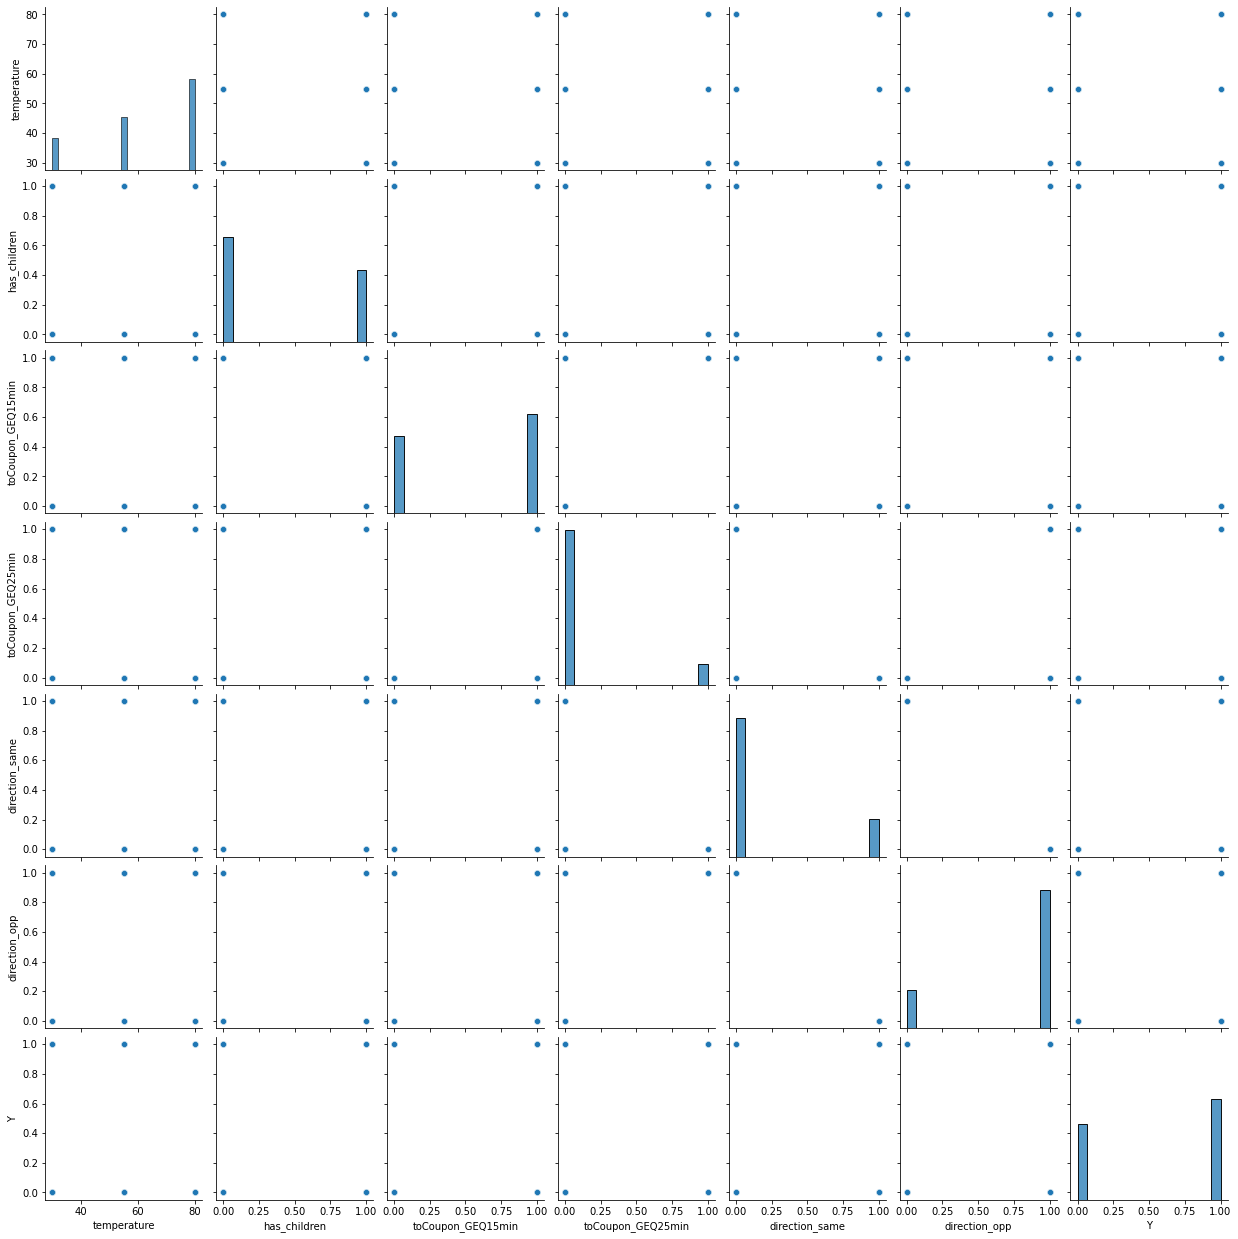

In [56]:
sns.pairplot(data_clean)

We can see that all integer variables are not continuouse and exploring for correlations with scatter plots will be hard since that are grouped in categories. Hence, we will focus our investigation through bar charts and histograms.

Looking back at the table expressing the % acceptance per coupon class, I chose to investigate the Coffee House since their acceptance were close to 50% which I believe was low considering the popularity of Coffee.

In [57]:
#Similarly to the bar dataset, I will create a Coffee dataset.
data_coffee = data_clean[data_clean['coupon']=='Coffee House']
print(data_coffee.shape)
data_coffee.head(5)

(3816, 25)


destination  passanger weather  temperature  time        coupon  \
23  No Urgent Place  Friend(s)   Sunny           80  10AM  Coffee House   
26  No Urgent Place  Friend(s)   Sunny           80   2PM  Coffee House   
27  No Urgent Place  Friend(s)   Sunny           80   2PM  Coffee House   
28  No Urgent Place  Friend(s)   Sunny           80   2PM  Coffee House   
30  No Urgent Place  Friend(s)   Sunny           80   6PM  Coffee House   

   expiration gender age maritalStatus  ...  CoffeeHouse CarryAway  \
23         2h   Male  21        Single  ...        less1       4~8   
26         1d   Male  21        Single  ...        less1       4~8   
27         2h   Male  21        Single  ...        less1       4~8   
28         1d   Male  21        Single  ...        less1       4~8   
30         2h   Male  21        Single  ...        less1       4~8   

   RestaurantLessThan20 Restaurant20To50 toCoupon_GEQ15min toCoupon_GEQ25min  \
23                  4~8            less1                 0                 0   
26                  4~8            less1                 0                 0   
27                  4~8            less1                 1                 0   
28                  4~8            less1                 1                 0   
30                  4~8            less1                 0                 0   

   direction_same direction_opp  Y  Coupon_Acceptance  
23              0             1  0       Not_Accepted  
26              0             1  0       Not_Accepted  
27              0             1  0       Not_Accepted  
28              0             1  0       Not_Accepted  
30              0             1  0       Not_Accepted  

[5 rows x 25 columns]

The coffee dataset has 3,816 observations.

In [58]:
#Visualize through a pie chart the coupon acceptance
pie_coffee = px.pie(data_coffee, names = 'Coupon_Acceptance', title = 'Coffee House coupon acceptance', 
                    color_discrete_sequence = px.colors.qualitative.Dark2, width = 900, height = 450)
pie_coffee.show(rendered = 'png')

### 1. We will explore the coupon acceptance by frequency of visits

In [59]:
#Create a bar chart illustrating the frequency of attendence and acceptance rate
fig_coffee = px.histogram(data_coffee, x ='CoffeeHouse',color='Coupon_Acceptance', 
                       title = 'Coffee House coupon acceptance according to attendance per month',
                     color_discrete_sequence = px.colors.qualitative.Dark2, width = 900, height = 450)
fig_coffee.update_xaxes(categoryorder = 'array', categoryarray = ['never','less1', '1~3', '4~8', 'gt8'])
fig_coffee.update_layout(
    xaxis_title='Number of Visits',
    yaxis_title= 'Count')
fig_coffee.show(rendered = 'png')

Similarly to Bar coupon, the higher the number of visits the more likely the use of a Coffee House coupon. The less1 and 1~3 frequency were the most present in the sample.

In [60]:
#Create a table to numerically quantify the graph above
Tbl_coffee_freq = data_coffee.groupby(['CoffeeHouse','Coupon_Acceptance'])[['Coupon_Acceptance']].count()
Tbl_coffee_freq['Coupon_%_Per_Freq'] = Tbl_coffee_freq/Tbl_coffee_freq.groupby(level=0).sum()*100
Tbl_coffee_freq['Bar_Total_Acceptance_%'] = Tbl_coffee_freq['Coupon_Acceptance']/Tbl_coffee_freq['Coupon_Acceptance'].sum()*100
Tbl_coffee_freq

Coupon_Acceptance  Coupon_%_Per_Freq  \
CoffeeHouse Coupon_Acceptance                                         
1~3         Accepted                         660          64.769382   
            Not_Accepted                     359          35.230618   
4~8         Accepted                         346          68.244576   
            Not_Accepted                     161          31.755424   
gt8         Accepted                         225          65.789474   
            Not_Accepted                     117          34.210526   
less1       Accepted                         506          48.098859   
            Not_Accepted                     546          51.901141   
never       Accepted                         157          17.522321   
            Not_Accepted                     739          82.477679   

                               Bar_Total_Acceptance_%  
CoffeeHouse Coupon_Acceptance                          
1~3         Accepted                        17.295597  
            Not_Accepted                     9.407757  
4~8         Accepted                         9.067086  
            Not_Accepted                     4.219078  
gt8         Accepted                         5.896226  
            Not_Accepted                     3.066038  
less1       Accepted                        13.259958  
            Not_Accepted                    14.308176  
never       Accepted                         4.114256  
            Not_Accepted                    19.365828

We can notice that the acceptance rate varies importantly between those who frequently visit the coffee house and those who visit a coffee house <1 time a month. Hence, number of visits is an important factor for the acceptance of a coffee house coupon. With the frequency 4~8 having the highest acceptance rate of 68.24%

### 2. Focus on the dataset with visits greater than 1 a month

In [61]:
#Create list criteria to filter the table
List_Visits_Coffee = ["1~3", "4~8", "gt8"]

#Create Dataset
data_coffee_MoreOne = data_coffee[data_coffee['CoffeeHouse'].isin(List_Visits_Coffee)]
data_coffee_MoreOne.shape

(1868, 25)

### 3. We will explore the impact of the Time for people frequenting the Coffee House more than once a month

In [62]:
#Make a bar chart to explore the distribution and acceptance of the sample
fig_coffee_time = px.histogram(data_coffee_MoreOne, x ='time',color='Coupon_Acceptance', 
                       title = 'Coffee House coupon acceptance according to time given more than 1 visit per month',
                      width = 900, height = 450)
fig_coffee_time.update_xaxes(categoryorder = 'array', categoryarray = ['7AM','10AM', '2PM', '6PM', '10PM'])
fig_coffee_time.update_layout(
    xaxis_title='Time of Visits',
    yaxis_title= 'Count')
fig_coffee_time.show(rendered = 'png')

We can notice a distribution much more equal. Other than the 10 PM category, there are fairly equal in appearances.

In [63]:
#Measure Acceptance Numerically
df_coffe_MoreOne_Time = data_coffee_MoreOne.groupby(['CoffeeHouse','time','Coupon_Acceptance'])[['Coupon_Acceptance']].count()
df_coffe_MoreOne_Time['Coupon_%_Per_Category'] = df_coffe_MoreOne_Time/df_coffe_MoreOne_Time.groupby(['CoffeeHouse', 'time']).sum()*100
df_coffe_MoreOne_Time['Total Acceptance %'] = df_coffe_MoreOne_Time['Coupon_Acceptance']/df_coffe_MoreOne_Time['Coupon_Acceptance'].sum()*100
df_coffe_MoreOne_Time

Coupon_Acceptance  Coupon_%_Per_Category  \
CoffeeHouse time Coupon_Acceptance                                             
1~3         10AM Accepted                         173              80.465116   
                 Not_Accepted                      42              19.534884   
            10PM Accepted                          31              53.448276   
                 Not_Accepted                      27              46.551724   
            2PM  Accepted                         168              75.000000   
                 Not_Accepted                      56              25.000000   
            6PM  Accepted                         164              56.164384   
                 Not_Accepted                     128              43.835616   
            7AM  Accepted                         124              53.913043   
                 Not_Accepted                     106              46.086957   
4~8         10AM Accepted                          93              82.300885   
                 Not_Accepted                      20              17.699115   
            10PM Accepted                          27              60.000000   
                 Not_Accepted                      18              40.000000   
            2PM  Accepted                          61              64.210526   
                 Not_Accepted                      34              35.789474   
            6PM  Accepted                          92              65.248227   
                 Not_Accepted                      49              34.751773   
            7AM  Accepted                          73              64.601770   
                 Not_Accepted                      40              35.398230   
gt8         10AM Accepted                          60              81.081081   
                 Not_Accepted                      14              18.918919   
            10PM Accepted                           9              26.470588   
                 Not_Accepted                      25              73.529412   
            2PM  Accepted                          51              79.687500   
                 Not_Accepted                      13              20.312500   
            6PM  Accepted                          50              58.139535   
                 Not_Accepted                      36              41.860465   
            7AM  Accepted                          55              65.476190   
                 Not_Accepted                      29              34.523810   

                                    Total Acceptance %  
CoffeeHouse time Coupon_Acceptance                      
1~3         10AM Accepted                     9.261242  
                 Not_Accepted                 2.248394  
            10PM Accepted                     1.659529  
                 Not_Accepted                 1.445396  
            2PM  Accepted                     8.993576  
                 Not_Accepted                 2.997859  
            6PM  Accepted                     8.779443  
                 Not_Accepted                 6.852248  
            7AM  Accepted                     6.638116  
                 Not_Accepted                 5.674518  
4~8         10AM Accepted                     4.978587  
                 Not_Accepted                 1.070664  
            10PM Accepted                     1.445396  
                 Not_Accepted                 0.963597  
            2PM  Accepted                     3.265525  
                 Not_Accepted                 1.820128  
            6PM  Accepted                     4.925054  
                 Not_Accepted                 2.623126  
            7AM  Accepted                     3.907923  
                 Not_Accepted                 2.141328  
gt8         10AM Accepted                     3.211991  
                 Not_Accepted                 0.749465  
            10PM Accepted                     0.481799  
                 Not_Accepted                 1.33

When looking numerically, we can see that 10 AM and 2PM are the most accepted times amongst these 3 level of visits. 2Pm does not seem significant for 4~8 people. It is clear that Time is an important factor for the acceptance of coupons.

### Let's focus on the most successful time (10AM-2PM)

In [64]:
#Create list criteria to filter the table
List_Time_Coffee = ["10AM", "2PM"]

#Create Dataset
data_coffee_MoreOne_time = data_coffee_MoreOne[data_coffee_MoreOne['time'].isin(List_Time_Coffee)]
data_coffee_MoreOne_time.shape

(785, 25)

### 4. Explore impact of direction given more than 1 visit

In [65]:
data_coffee_MoreOne_time['direction_same'].unique()

array([0], dtype=int64)

Between at 10AM and 2PM all coupons given were in the opposite direction hence no impact on the outcome for the hours 10AM to 2PM. Then we will focus on the impact of direction for all other groups.

### 5. Explore impact of direction for all number of visits and all times

In [66]:
#Measure Acceptance Numerically for the same direction
df_coffee_Direct = data_coffee.groupby(['CoffeeHouse','direction_same','Coupon_Acceptance'])[['Coupon_Acceptance']].count()
df_coffee_Direct['Coupon_%_Per_Category'] = df_coffee_Direct/df_coffee_Direct.groupby(['CoffeeHouse', 'direction_same']).sum()*100
df_coffee_Direct['Total Acceptance %'] = df_coffee_Direct['Coupon_Acceptance']/df_coffee_Direct['Coupon_Acceptance'].sum()*100
df_coffee_Direct

Coupon_Acceptance  \
CoffeeHouse direction_same Coupon_Acceptance                      
1~3         0              Accepted                         543   
                           Not_Accepted                     308   
            1              Accepted                         117   
                           Not_Accepted                      51   
4~8         0              Accepted                         266   
                           Not_Accepted                     141   
            1              Accepted                          80   
                           Not_Accepted                      20   
gt8         0              Accepted                         174   
                           Not_Accepted                      96   
            1              Accepted                          51   
                           Not_Accepted                      21   
less1       0              Accepted                         412   
                           Not_Accepted                     447   
            1              Accepted                          94   
                           Not_Accepted                      99   
never       0              Accepted                         122   
                           Not_Accepted                     591   
            1              Accepted                          35   
                           Not_Accepted                     148   

                                              Coupon_%_Per_Category  \
CoffeeHouse direction_same Coupon_Acceptance                          
1~3         0              Accepted                       63.807286   
                           Not_Accepted                   36.192714   
            1              Accepted                       69.642857   
                           Not_Accepted                   30.357143   
4~8         0              Accepted                       65.356265   
                           Not_Accepted                   34.643735   
            1              Accepted                       80.000000   
                           Not_Accepted                   20.000000   
gt8         0              Accepted                       64.444444   
                           Not_Accepted                   35.555556   
            1              Accepted                       70.833333   
                           Not_Accepted                   29.166667   
less1       0              Accepted                       47.962747   
                           Not_Accepted                   52.037253   
            1              Accepted                       48.704663   
                           Not_Accepted                   51.295337   
never       0              Accepted                       17.110799   
                           Not_Accepted                   82.889201   
            1              Accepted                       19.125683   
                           Not_Accepted                   80.874317   

                                              Total Acceptance %  
CoffeeHouse direction_same Coupon_Acceptance                      
1~3         0              Accepted                    14.229560  
                           Not_Accepted                 8.071279  
            1              Accepted                     3.066038  
                           Not_Accepted                 1.336478  
4~8         0              Accepted                     6.970650  
                           Not_Accepted                 3.694969  
            1              Accepted                     2.096436  
                           Not_Accepted                 0.524109  
gt8         0              Accepted                     4.559748  
                           Not_Accepted                 2.515723  
            1              Accepted                     1.336478  
                           Not_Accepted                 0.550314  
less1       0              Accepted                    10.796646  
   

Using the direction data, we can see that the impact of same direction is not significant. Hence, same direction or opposite direction does not materially impact in general the groups. But it incrementally increases the chances of acceptance.

### 6. Explore impact of weather given more than 1 visits per month

In [67]:
#We will make a histogram to illustrate the acceptance according to the weather
fig_coffee_weat = px.histogram(data_coffee_MoreOne, x ='weather',color='Coupon_Acceptance', 
                       title = 'Coffee House coupon acceptance according to the weather given 1 or more visits per month',
                              width = 900, height = 450)

fig_coffee_weat.show(rendered = 'png')

In [68]:
#Measure Acceptance Numerically for the weather given more than 1 visit
Tbl_coffe_MoreOne_Weat = data_coffee_MoreOne.groupby(['weather','Coupon_Acceptance'])[['Coupon_Acceptance']].count()
Tbl_coffe_MoreOne_Weat['Coupon_%_Per_Category'] = Tbl_coffe_MoreOne_Weat/Tbl_coffe_MoreOne_Weat.groupby(['weather']).sum()*100
Tbl_coffe_MoreOne_Weat['Total Acceptance %'] = Tbl_coffe_MoreOne_Weat['Coupon_Acceptance']/Tbl_coffe_MoreOne_Weat['Coupon_Acceptance'].sum()*100
Tbl_coffe_MoreOne_Weat

Coupon_Acceptance  Coupon_%_Per_Category  \
weather Coupon_Acceptance                                             
Rainy   Accepted                          57              59.375000   
        Not_Accepted                      39              40.625000   
Snowy   Accepted                          77              53.103448   
        Not_Accepted                      68              46.896552   
Sunny   Accepted                        1097              67.424708   
        Not_Accepted                     530              32.575292   

                           Total Acceptance %  
weather Coupon_Acceptance                      
Rainy   Accepted                     3.051392  
        Not_Accepted                 2.087794  
Snowy   Accepted                     4.122056  
        Not_Accepted                 3.640257  
Sunny   Accepted                    58.725910  
        Not_Accepted                28.372591

In [69]:
#Measure Acceptance Numerically for the temperature given more than 1 visit
Tbl_coffe_MoreOne_Temp = data_coffee_MoreOne.groupby(['temperature','Coupon_Acceptance'])[['Coupon_Acceptance']].count()
Tbl_coffe_MoreOne_Temp['Coupon_%_Per_Category'] = Tbl_coffe_MoreOne_Temp/Tbl_coffe_MoreOne_Temp.groupby(['temperature']).sum()*100
Tbl_coffe_MoreOne_Temp['Total Acceptance %'] = Tbl_coffe_MoreOne_Temp['Coupon_Acceptance']/Tbl_coffe_MoreOne_Temp['Coupon_Acceptance'].sum()*100
Tbl_coffe_MoreOne_Temp

Coupon_Acceptance  Coupon_%_Per_Category  \
temperature Coupon_Acceptance                                             
30          Accepted                          84              54.545455   
            Not_Accepted                      70              45.454545   
55          Accepted                         358              58.784893   
            Not_Accepted                     251              41.215107   
80          Accepted                         789              71.402715   
            Not_Accepted                     316              28.597285   

                               Total Acceptance %  
temperature Coupon_Acceptance                      
30          Accepted                     4.496788  
            Not_Accepted                 3.747323  
55          Accepted                    19.164882  
            Not_Accepted                13.436831  
80          Accepted                    42.237687  
            Not_Accepted                16.916488

The acceptance of coupons given a warm and sunny day will be higher than other temperature or weather.

### 7. Explore the acceptance ratio per age group given more than 1 visit and between 10AM and 2PM

In [70]:
#Create a histogram to illsutrate the relationship between age and acceptance
fig_coffee_age = px.histogram(data_coffee_MoreOne_time, x ='age',color='Coupon_Acceptance', 
                       title = 'Coffee House coupon acceptance according to age groups given more than 1 visit',
                               width = 900, height = 450)
fig_coffee_age.update_xaxes(categoryorder = 'array', categoryarray = ['below21','21', '26', '31', '36', '41', '46', '50plus'])
fig_coffee_age.show(rendered = 'png')

In [71]:
#Create a table to illsutrate the relationship between age and acceptance
Tbl_coffe_MoreOne_T_Age = data_coffee_MoreOne_time.groupby(['age','Coupon_Acceptance'])[['Coupon_Acceptance']].count()
Tbl_coffe_MoreOne_T_Age['Coupon_%_Per_Category'] = Tbl_coffe_MoreOne_T_Age/Tbl_coffe_MoreOne_T_Age.groupby(['age']).sum()*100
Tbl_coffe_MoreOne_T_Age['Total Acceptance %'] = Tbl_coffe_MoreOne_T_Age['Coupon_Acceptance']/Tbl_coffe_MoreOne_T_Age['Coupon_Acceptance'].sum()*100
Tbl_coffe_MoreOne_T_Age

Coupon_Acceptance  Coupon_%_Per_Category  \
age     Coupon_Acceptance                                             
21      Accepted                         138              83.132530   
        Not_Accepted                      28              16.867470   
26      Accepted                         146              76.439791   
        Not_Accepted                      45              23.560209   
31      Accepted                          88              73.949580   
        Not_Accepted                      31              26.050420   
36      Accepted                          53              71.621622   
        Not_Accepted                      21              28.378378   
41      Accepted                          46              68.656716   
        Not_Accepted                      21              31.343284   
46      Accepted                          28              80.000000   
        Not_Accepted                       7              20.000000   
50plus  Accepted                          71              79.775281   
        Not_Accepted                      18              20.224719   
below21 Accepted                          36              81.818182   
        Not_Accepted                       8              18.181818   

                           Total Acceptance %  
age     Coupon_Acceptance                      
21      Accepted                    17.579618  
        Not_Accepted                 3.566879  
26      Accepted                    18.598726  
        Not_Accepted                 5.732484  
31      Accepted                    11.210191  
        Not_Accepted                 3.949045  
36      Accepted                     6.751592  
        Not_Accepted                 2.675159  
41      Accepted                     5.859873  
        Not_Accepted                 2.675159  
46      Accepted                     3.566879  
        Not_Accepted                 0.891720  
50plus  Accepted                     9.044586  
        Not_Accepted                 2.292994  
below21 Accepted                     4.585987  
        Not_Accepted                 1.019108

The age groups below21 and 21 have the highest chances of accepting coupons between 10AM & 2PM given that they frequently go to a Coffee House.

In [72]:
# We will look at the distribution to better understand the sample of age groups
fig_vio_coffee = px.violin(data_coffee_MoreOne_time, x ='time',y='age', color='Coupon_Acceptance', 
                       title = 'Coffee House coupon acceptance distribution for drivers according to age and time',
                      width = 900, height = 450)
fig_vio_coffee.update_yaxes(categoryorder = 'array', categoryarray = ['below21','21', '26', '31', '36', '41', '46', '50plus'])
fig_vio_coffee.update_layout(
    xaxis_title='Number of Visits',
    yaxis_title= 'Age')
fig_vio_coffee.show(rendered = 'png')

The interesting highlight from the violin graph is that the number of not accepted coupons for the ages 36 and 41 is much thicker at 2PM than for 10AM. This indicates the acceptance rate to be lower for these two groups at 2PM.

### 8. Given the previous investigation, I want to further understand the breakdown of accepted coupons according the gender, same direction and age variable for all times and number of visits

In [73]:
#sunburst chart to better understand the breakdown of the bar dataset
fig_sun_coffee = px.sunburst(data_coffee, path = ['gender','direction_same', 'age'], values='Y', 
                          title = 'Decomposition of accepted Coffee House coupons by Gender, Same Direction and age',
                      width = 900, height = 700 )
fig_sun_coffee.show(rendered = 'png')

The number of coupons accepted for Coffee House are almost evenly split between male and female. The large majority of coupon accepted were in different direction and were identified by the 0 in the second ring of the sunburst. Furthermore, ages 21 and 26 were the most present in the accepted coupon sample.

### 9. As a final step, I wanted explore the breakdown of accepted coupons for people visiting a coffee house more than once a month given their age and income.

In [74]:
#To do so, we will make a heatmap
fig_heatmap_income = px.density_heatmap(data_coffee_MoreOne.query('Y == 1'), x='income', y='age', text_auto = True,
                                      title = 'Heatmap of accepted Coffee House coupons by age and income',
                                        width = 900, height = 700 )


fig_heatmap_income.update_yaxes(categoryorder = 'array', categoryarray = ['below21','21', '26', '31', '36', '41', '46', '50plus'])
fig_heatmap_income.update_xaxes(categoryorder = 'array', categoryarray = ['Less than $12500','$12500 - $24999',
                                                '$25000 - $37499', '$37500 - $49999','$50000 - $62499', '$62500 - $74999',
                                                                          '$75000 - $87499','$87500 - $99999','$100000 or More'])
fig_heatmap_income.update_layout(
    xaxis_title='Number of Visits',
    yaxis_title= 'Age')

fig_heatmap_income.show(rendered = 'png')

We can notice the heatmap highlights that most acceptance are lower income and ages of 26-21. The age of 21 seems to be the most likely to accept coupons. Looking back at our violin plot, the heatmap may not be as significant since the sample containe a larger sample of this age group translating in a higher presence in the heatmap. On the other hand, there seems to be a correlation for lower end income to accept more coffee house coupons.

### Investigation Conclusion

Given the following observations:
1. The more the visits the higher the acceptance of coupons.
2. The highest acceptance times are 10AM and 2PM.
3. A small increase in acceptance of coupons is present for people going in the same direction as the coupon.
4. When it is 80 and when it is sunny, there is a higher chance to accept coffee house coupons.
5. People with a salary of 12500-62499 had the most coupons accepted.
6. The ages of below21 and 21 had the highest acceptance ratio of all age groups.

We can hypothesize the following:
- The more the visits per month the higher the acceptance of coupons.
- Between time of 10AM and 2PM, coupons have a much higher chance of being accepted.
- Offering coupons on a hot sunny day has a higher chance of being accepted.
- Coupons will be more accepted by people with salary of 12500-62499

### Practical Application Conclusion

Accros both our investigation and the bar questions, we were able to see that the frequency of visits greatly impact the acceptance rate. In general, the more often a person visited a eatery, the more likely he was to accept to coupon. When it is hot, both coupons saw an increase in acceptance. The age group for both coupon, showed to be an important variable impacting the acceptance rate. In bars, ages of 25 or more had a better chance to accept coupons. In addition, when visiting a bar regularly, having a passanger other than a kid made the acceptance ratio much higher. Coffee House saw a significant increase in acceptance given the time of day with 10AM and 2PM having the highest acceptance ratio.

### Future Recommendation

- Since data was all categorical or boolean, we could not use powerful tools such as scatter plots or pair plots. Collecting such data such as salary or geographical location could be very useful.
- The sample of data varying greatly between groups made the interpretation challenging at a higher level. For instance, the sunburst chart indicated that opposite direction was most present in the accepted coupons but when making subgroups, we were able to conclude that the same direction had a higher chance of being accepted. Future exploration could focus on addressing such problem.
- We can explore the impact of attending various types of coupons.
- Explore more coupon types although the commonality were highlighted across two coupons types, it would be interesting to explore more coupons and the commonality across these groups.
- Explore interaction between the variable columns.
- Explore if earning higher salary impacts the exclusivity of spending/the chance of accepting coupons at more than one type of restaurant/eatery.